## 1. plotting data

In [0]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data.txt", delimiter=',')
#주어진 데이터의 형태(x1,x2,l)
x1      = data[:, 0]
x2      = data[:, 1]
label   = data[:, 2]

No handles with labels found to put in legend.


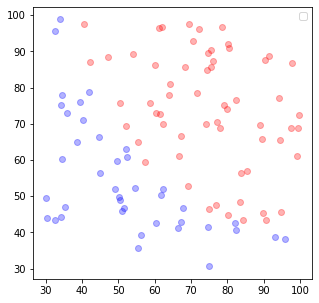

In [279]:
#(x,y)에 대해 labelling을 plotting
x1_label0    = x1[label == 0]
x1_label1    = x1[label == 1]

x2_label0    = x2[label == 0]
x2_label1    = x2[label == 1]

plt.figure(figsize=(5, 5))
plt.scatter(x1_label0, x2_label0, alpha=0.3, c='b')
plt.scatter(x1_label1, x2_label1, alpha=0.3, c='r')
plt.legend()
plt.show()

In [0]:
data = np.array([x1,x2,label])

In [0]:
X = np.transpose(np.array(data[:-1]))
y = np.transpose(np.array(data[-1:]))
m = y.size

In [0]:
# X에는 1을 가지는 열을 삽이반다(interception계산을 위해)
X = np.insert(X,0,1,axis=1)

## 2. define function
- linear regression에서 함수를 정의했던 것처럼 logistic에서도 h, 비용함수(ObjectiveFunc), GradientDescent 함수를 정의한다
- 마찬가지로 데이터또한 X=(1,x1,x2)로 두고 theta=(theta0, theta1, theta2)형태로 만든다. label=(0,1)

In [0]:
#X벡터값과 theta값을 받았을 때 도출할 수 있는 logistic model
def h(theta, X):
  z = np.dot(X,theta)
  return 1/(np.exp(-z)+1)

In [0]:
#Objective function
def ObjectiveFunc(theta, X, label,m):
  for_0 = np.dot(-np.array(label).T,np.log(h(theta, X)))
  for_1 = np.dot((1-np.array(label)).T,np.log(1-h(theta,X)))
  return float((1./m)*(np.sum(for_0 - for_1)))

In [0]:
# Gradient descent using ObjectiveFunc
iteration = 1000000 # hyperparameter
alpha = 0.0000001

def GradientDescent(X,label,theta,m):
    #plotting위해 저장하는 history
    J_history = [] 
    theta_history = []

    #iteration
    for i in range(iteration):
        tmp = theta #동시에 update하기 위해선 교환하기 위한 새로운 변수가 필요
        
        J_history.append(ObjectiveFunc(theta,X,label,m))
        theta_history.append(list(theta[:,0]))

        #update theta
        for j in range(len(tmp)):
            tmp[j] = theta[j] - (alpha/m)*np.sum((h(theta,X) - label)*np.array(X[:,j]).reshape(m,1))
        theta = tmp 
    return theta, theta_history, J_history

In [0]:
#theta초깃값 
theta = np.array([[-0.8],[-0.8],[-0.8]])

In [0]:
# Gradient descent계산
theta, theta_history, J_history = GradientDescent(X,y, theta,m)

In [396]:
theta #확인

array([[-0.79424896],
       [ 0.01597051],
       [ 0.00664175]])

In [397]:
J_history[:10] #cost값 10개만 확인

[71.84415589401985,
 71.8437579692144,
 71.84336004440895,
 71.84296211960351,
 71.84256419479806,
 71.84216626999262,
 71.84176834518718,
 71.84137042038172,
 71.84097249557628,
 71.84057457077083]

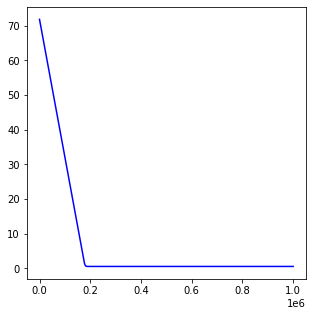

In [398]:
# cost값 plotting
plt.figure(figsize=(5, 5))
plt.plot(range(len(J_history)),J_history,'b')

In [0]:
theta0_history = [] 
theta1_history = []
theta2_history = []

for i in range(len(theta_history)):
  theta0_history.append(theta_history[i][0])
  theta1_history.append(theta_history[i][1])
  theta2_history.append(theta_history[i][2])

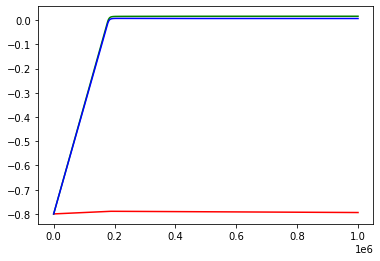

In [400]:
# plotting each parameter(theta0, theta1, theta2)
# 주의할 점은 각 theta별로 분리해서 plotting 해줘야 한다는 점. 
plt.plot(theta0_history,'r') #theta0 값
plt.plot(theta1_history,'g') #theta1 값
plt.plot(theta2_history,'b') #theta2 값

## 3. plotting the obtained Classifier
- decision boundary를 기준으로 이로부터 멀어질수록 각 red, blue값이 진해지도록 그린다. 
- classifier그리고 그위에 데이터 plotting
- grid colormap plotting

In [402]:
theta[0]

array([-0.79424896])

In [0]:
# 분류되는 값을 저장한다. 
x_label_1 = [] #1으로 분류되는 값 저장하는 리스트 
y_label_1 = []

x_label_0 = [] #0으로 분류되는 값 저장하는 리스트 
y_label_0 = []

for i in np.arange(30,100,0.5):
  for j in np.arange(30,100,0.5):
    z = theta[0] + i*theta[1] + j*theta[2]
    if(1/(np.exp(-z)+1)) >= 0.5 :
      x_label_1.append(i)
      y_label_1.append(j)
    else:
      x_label_0.append(i)
      y_label_0.append(j)

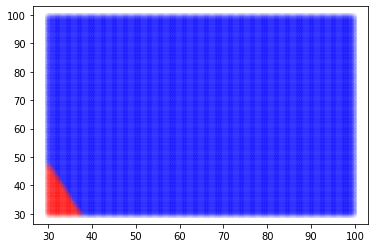

In [408]:
plt.scatter(x_label_1, y_label_1, alpha=0.1, c='b')
plt.scatter(x_label_0, y_label_0, alpha=0.1, c='r')